<table style="width:100%; background-color:#FFFFFF" align="left">
 <tr>
   <td style="text-align:left; background-color:#FFFFFF">
       <p>Prof. Dr. Stefan Decker <br>
        M. Slupczynski, L. Neumann, M. Kißgen, T. Holzheim</p>
        <p><strong>2025-06-27</strong></p>
     </td>
   <td style="text-align:right; background-color:#FFFFFF">
     <div>
       <img src="https://git.rwth-aachen.de/i5/teaching/dbis-raw/-/raw/main/dbis-logo.png" width="500"/>
     </div>
    </td>
 </tr>
</table>
<div class="clearfix"></div>
<center>
    <h1>Datenbanken und Informationssysteme (SoSe 2025) </h1>
    <h1>Übung 10 - SPARQL und RDFs</h1>
</center>

<center>
    <h4>Abgabe bis 2025-07-04 14:15</h4>
    <strong>Zu spät eingereichte Übungen werden nicht berücksichtigt.</strong>
</center>

<div class="hidden-print"><hr />
<h3> Wichtige Hinweise</h3>
<ul>
<li>Bei Nichtbeachtung dieser Hinweise wird die Abgabe mit 0 Punkten bewertet!</li>
<li>Bitte laden Sie Ihre digitalen Lösungen mit diesem Notebook ins Moodle hoch.</li>
<li>Bitte geben Sie Namen, Matrikelnummern auf der schriftlichen Lösung an.</li>
</ul></div>

<strong>Die Lösung zu diesem Übungsblatt wird in den Übungen am 4. August und 07. Juli vorgestellt. <br /> 
Bitte beachten Sie auch die aktuellen Ankündigungen im Moodle-Lernraum zur Vorlesung. </strong> <br />
<em>* bezeichnet Bonusaufgaben.</em>
<hr />

<h3>Abgabegruppe</h3>
Es ist möglich die Abgabe in Gruppen von bis zu fünf Personen zu bearbeiten. <strong>Jeder Gruppenteilnehmer muss für sich ein Notebook hochladen</strong>. Wenn Sie in einer Abgabegruppe arbeiten, dürfen die Notebooks der Gruppenteilnehmer den gleichen Inhalt aufweisen. Wenn Sie in einer Gruppe arbeiten, tragen Sie hier bitte alle Gruppenteilnehmer inklusive sich selbst ein. <strong>Eine inkonsistente Angabe von Gruppenmitgliedern bei den Teilnehmern führt im Zweifel zu 0 Punkten für alle Gruppenteilnehmer!</strong> Es ist möglich zwischen den Abgaben die Gruppen zu wechseln.

<h4>Andere Gruppenteilnehmer (Wenn Einzelabgabe, bitte leer lassen)</h4>
<ul>
    <li>Neo Ahrens, 456647</li>
    <li>Yorck Heilmann, 456599</li>
    <li>Christian Bick, 456513</li>
    <li>Michael Hübner, 457202</li>
    <li>Kai Seeling, 456990</li>
</ul>

In [2]:
!pip install -q jupyter-rdfify~=1.3 --index-url https://git.rwth-aachen.de/api/v4/projects/49225/packages/pypi/simple
%pip install -q requests -U --user
%pip install -q chardet -U --user
%pip install -q charset_normalizer -U --user
%pip install -q dbis-exc-manager --user
#Diese code Zeile wirft Fehler wenn jupyter-rdfify nicht richtige geladen ist. Man sollte den Kernel einmal neustarten damit das Modul geladen wird.
%reload_ext jupyter-rdfify 

try:
# import libraries
    from excmanager.Task import Exercise, Task, SubTask
    from excmanager.scorer import SetScorer
    from IPython.display import display, HTML
    import warnings
    # initialize task structure
    exc = Exercise(9)
    task1 = Task( exc, "10.1" )
    task2 = Task( exc, "10.2" )    
    task3 = Task( exc, "10.3" )    
    task4 = Task( exc, "10.4" )
    tasks_ready = {"10.1": {}, "10.2": {}, "10.3": {}, "10.4": {}}
except Exception as e:
    display(HTML(f"<div class='alert alert-danger'><h2> Etwas ist beim import schief gelaufen:</h1>{e}</div>"))
else:
    display(HTML("<div class='alert alert-success'><h1> OK, es kann los gehen!</h1></div>"))

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


/opt/conda/envs/python313/lib/python3.13/site-packages/rdflib_jsonld/__init__.py:9: DeprecationWarning: The rdflib-jsonld package has been integrated into rdflib as of rdflib==6.0.0.  Please remove rdflib-jsonld from your project's dependencies.
  warnings.warn(


<div class="alert alert-info">
<b>Wichtig</b><br>
Bitte validieren Sie die Serialisierung Ihrer RDF Graphen mit dem Validator auf dieser Seite: <a href="http://ttl.summerofcode.be">Turtle Validator</a>. Dort müssen Sie lediglich Ihre Serialisierung einfügen und auf 'Validate!' klicken. Evtl. Fehler werden dann sichtbar. Syntaktisch inkorrekte Lösungen werden mit 0 Punkten bewertet. Beachten Sie auch mögliche Fehlermeldungen der entsprechenden Zellen in diesem Notebook.
</div>

<div class="pull-left">
    <br>
    <h2> Aufgabe 10.1 (RDF Datenmodell 1)</h2>
</div>

<div class="pull-right">
    <h3> (5 Punkte) </h3>
</div>

<div class="row"><div class="pull-left"><h2>Teilaufgabe 10.1 a)</h2></div><div class="pull-right"><h3>(2 Punkte)</h3></div></div>

### Gegeben sind die folgenden Informationen:
*  `<http://example.org/aachen>` ist eine Stadt
* Diese Stadt hat den Namen "Aachen" auf Deutsch und "Aix-la-Chapelle" auf Französisch.
* Die Stadt hat eine Bevölkerung von 249,431 Menschen (die Bevölkerungszahl ist ein Literal mit integer-Datentyp).
* Die Stadt liegt im Bundesland (`http://example.org/bundesland`) Nordrhein-Westfalen (`<http://example.org/nrw>`).
* Die Fläche der Stadt ist 160.85 Quadratkilometer (die Fläche ist ein Literal mit float-Datentyp).
* `<http://example.org/rwth>` ist eine Universität, die sich in der Stadt Aachen befindet.

**Modellieren Sie die o.g. Informationen mit dem folgenden Vokabular:**

* Stadt: <http://example.org/Stadt>
* Name: <http://example.org/name>
* Bevölkerung: <http://example.org/bevölkerung>
* Bundesland: <http://example.org/bundesland>
* Nordrhein-Westfalen: <http://example.org/nrw>
* Fläche: <http://example.org/fläche>
* Universität: <http://example.org/Universität>
* BefindetSichIn: <http://example.org/befindetSichIn>
* integer: <http://www.w3.org/2001/XMLSchema#int>
* float: <http://www.w3.org/2001/XMLSchema#float>
* ist ein / a: <http://www.w3.org/1999/02/22-rdf-syntax-ns#type>

**Beachten Sie, dass Sie für die Lösung dieser Aufgabe nur dieses Vokabular brauchen.**  
**Die Benutzung von CURIEs ist nicht zulässig!**

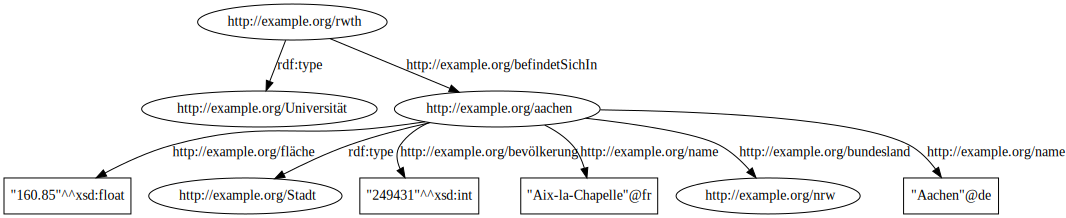

In [3]:
%%rdf turtle -l aachen
# IHR CODE HIER
<http://example.org/aachen> <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> <http://example.org/Stadt> .
<http://example.org/aachen> <http://example.org/name> "Aachen"@de .
<http://example.org/aachen> <http://example.org/name> "Aix-la-Chapelle"@fr .
<http://example.org/aachen> <http://example.org/bevölkerung> "249431"^^<http://www.w3.org/2001/XMLSchema#int> .
<http://example.org/aachen> <http://example.org/bundesland> <http://example.org/nrw> .
<http://example.org/aachen> <http://example.org/fläche> "160.85"^^<http://www.w3.org/2001/XMLSchema#float> .

<http://example.org/rwth> <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> <http://example.org/Universität> .
<http://example.org/rwth> <http://example.org/befindetSichIn> <http://example.org/aachen> .


#Die Ausführung der nächsten Codezelle, erlaubt ihnen ihre Antwort in die Zusammenfassung am Ende aufzunehmen!

In [4]:
# DIESEN TEIL NICHT VERÄNDERN, SONST GIBT ES 0 Punkte
# Aufgabe 10.1 a) (2 Punkte)

subtask_10_1 = SubTask(task1, "a", points=2) 

store = %rdf -r
num_triples = len(store["rdfgraphs"]["aachen"])

tasks_ready[subtask_10_1.task.task][subtask_10_1.subtask] = False

if num_triples == 8:
    tasks_ready[subtask_10_1.task.task][subtask_10_1.subtask] = True
else:
    warnings.warn(f"Der Graph soll 8 Triple beinhalten, beinhaltet {num_triples}") 
    
subtask_10_1.setSolution(store) 

In [ ]:
# Autograder check

<div class="row"><div class="pull-left"><h2>Teilaufgabe 10.1 b)</h2></div><div class="pull-right"><h3>(3 Punkte)</h3></div></div>

### Gegeben sind die folgenden Informationen:
Kontext: Sie möchten eine Datenbank von Alben als Archiv aufbauen. Ein Musiker hat das Album "Toxicity" mit den darin enthaltenen Titeln veröffentlicht. Sie haben keine IRI für den Musiker, daher müssen Sie für ihn einen Blank-Node benutzen. Das Album enthält mehrere Titel, die alle beschrieben werden müssen. Die Informationen über das Album und die Titel werden wie folgt angegeben:

Album: \
    Name: "Toxicity" \
    Erscheinungsjahr: "2001"

Titel: \
    Name: "Aerials"
    Dauer: "3:56"\
    Name: "Chop Suey!"
    Dauer: "3:31"

Auch für die Titel sind keine IRIs vorhanden, daher müssen Sie für sie Blank-Nodes benutzen.

Verwenden Sie die folgenden URIs (diesmal können Sie CURIEs verwenden):

   * Typ: http://www.w3.org/1999/02/22-rdf-syntax-ns#type
   * Musiker: http://example.org/classes#Musiker
   * hatAlbum: http://example.org/properties#hatAlbum
   * Album: http://example.org/classes#Album
   * Titel: http://example.org/classes#Titel
   * enthältTitel: http://example.org/properties#enthältTitel
   * hatErscheinungsjahr: http://example.org/properties#hatErscheinungsjahr
   * hatName: http://example.org/properties#hatName
   * hatDauer: http://example.org/properties#hatDauer

Beachten Sie, dass Sie für die Lösung dieser Aufgabe nur dieses Vokabular brauchen. Verwenden Sie nur String-Literale ohne Sprach-Tags und ohne Typbezeichnung.

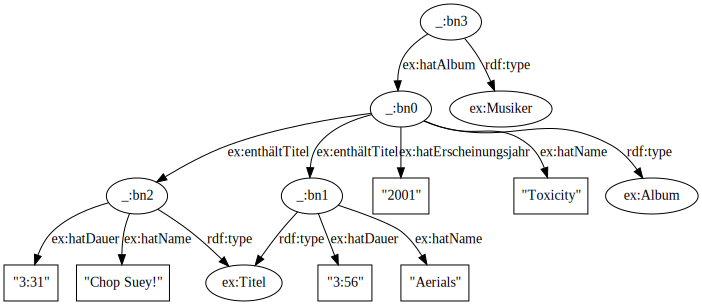

In [4]:
%%rdf turtle -l bnodes
@prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .
@prefix ex: <http://example.org/classes#> .
@prefix prop: <http://example.org/properties#> .

# IHR CODE HIER
_:musician rdf:type ex:Musiker ;
    ex:hatAlbum _:album .

_:album rdf:type ex:Album ;
    ex:hatName "Toxicity" ;
    ex:hatErscheinungsjahr "2001" ;
    ex:enthältTitel _:aerials, _:chopSuey .

_:aerials rdf:type ex:Titel ;
    ex:hatName "Aerials" ;
    ex:hatDauer "3:56" .

_:chopSuey rdf:type ex:Titel ;
    ex:hatName "Chop Suey!" ;
    ex:hatDauer "3:31" .

#Die Ausführung der nächsten Codezelle, erlaubt ihnen ihre Antwort in die Zusammenfassung am Ende aufzunehmen!

In [7]:
# DIESEN TEIL NICHT VERÄNDERN, SONST GIBT ES 0 Punkte
# Aufgabe 10.1 b) (3 Punkte)
subtask_10_1b = SubTask(task1, "b", points=3)
tasks_ready[subtask_10_1b.task.task][subtask_10_1b.subtask] = False  # Default: Nicht ready

store = %rdf -r
g = store["rdfgraphs"]["bnodes"]


try:
    if len(g) == 0:
        warnings.warn("Keine RDF-Triples gefunden. Ist die Lösung leer?")
    
    hat_album = list(g.triples((None, URIRef("http://example.org/properties#hatAlbum"), None)))
    if not hat_album:
        warnings.warn("Kein Triple mit 'prop:hatAlbum' gefunden.")
    
    enthält_titel = list(g.triples((None, URIRef("http://example.org/properties#enthältTitel"), None)))
    if len(enthält_titel) < 2:
        warnings.warn(f"Zu wenige 'prop:enthältTitel'-Triples (erwartet: ≥2, gefunden: {len(enthält_titel)}.")

    tasks_ready[subtask_10_1b.task.task][subtask_10_1b.subtask] = (len(g) > 0)

except Exception as e:
    warnings.warn(f"Fehler beim Parsen der Lösung: {str(e)}")

subtask_10_1b.setSolution(store)

/tmp/ipykernel_362/1042705541.py:25: UserWarning: Fehler beim Parsen der Lösung: name 'URIRef' is not defined
  warnings.warn(f"Fehler beim Parsen der Lösung: {str(e)}")


<div class="pull-left">
    <br>
    <h2> Aufgabe 10.2 (RDF Datenmodell 2)</h2>
</div>

<div class="pull-right">
    <h3> (4 Punkte) </h3>
</div>

<div class="row"><div class="pull-left"><h2>Teilaufgabe 10.2 a)</h2></div><div class="pull-right"><h3>(2 Punkte)</h3></div></div>

### Gegeben sind die folgenden Informationen:
Es gibt einen **Stern (#1)** mit dem Namen **"Sirius"** und einen zweiten **Stern (#2)** mit dem Namen **"Alpha Centauri C"**.\
Der erste Stern ist **8,6 Lichtjahre** von der Erde entfernt und hat einen Durchmesser von **1.710.000 Kilometern**. Er ist bekannt unter dem Spitznamen **"Alpha Canis Majoris"**. \
Der zweite Stern ist **4,24 Lichtjahre** von der Erde entfernt und hat einen Durchmesser von **200.000 Kilometern**. Er ist bekannt unter dem Spitznamen **"Proxima Centauri"**.\
Beide Sterne sind vom typ **Stern**.


**Wichtig:** \
-**Sie brauchen bei dieser Aufgabe keine Sprachtags zu verwenden.** \
-**Geben sie die entfernungZurErde als xsd:float , und den durchmesser als xsd:int mit den jeweils oben gegebenen Werten an. Beachten Sie die Verwendung von "." in englischer Notation für Kommazahlen.** 


Modellieren Sie die o.g. Informationen mit dem folgenden RDF/Turtle Vokabular:

- ex:Stern1
- ex:Stern2
- ex:name
- rdf:type
- ex:entfernungZurErde
- ex:spitzname
- ex:durchmesser
- ex:Stern

**Beachten Sie, dass Sie für die Lösung dieser Aufgabe nur dieses Vokabular brauchen.** \
**Nutzen Sie in dieser Aufgabe die vordefinierten CURIEs. Definieren Sie alle Namen mit englischem Sprach-Tag.**



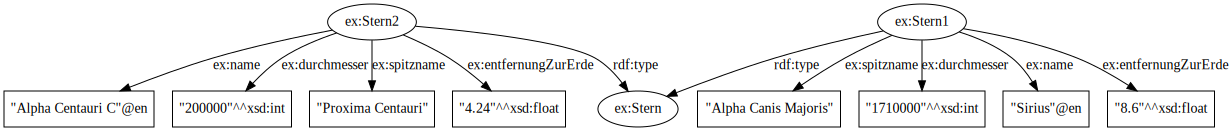

In [5]:
%%rdf turtle -l sterne
@prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .
@prefix xsd: <http://www.w3.org/2001/XMLSchema#>.
@prefix ex: <http://example.org/sterne/> .

# IHR CODE HIER
ex:Stern1 rdf:type ex:Stern ;
    ex:name "Sirius"@en ;
    ex:entfernungZurErde "8.6"^^xsd:float ;
    ex:durchmesser "1710000"^^xsd:int ;
    ex:spitzname "Alpha Canis Majoris" .

ex:Stern2 rdf:type ex:Stern ;
    ex:name "Alpha Centauri C"@en ;
    ex:entfernungZurErde "4.24"^^xsd:float ;
    ex:durchmesser "200000"^^xsd:int ;
    ex:spitzname "Proxima Centauri" .

#Die Ausführung der nächsten Codezelle, erlaubt ihnen ihre Antwort in die Zusammenfassung am Ende aufzunehmen!

In [ ]:
# DIESEN TEIL NICHT VERÄNDERN, SONST GIBT ES 0 Punkte
# Aufgabe 10.2 a) (2 Punkte)
subtask_10_2a = SubTask(task2, "a", points=2)
tasks_ready[subtask_10_2a.task.task][subtask_10_2a.subtask] = False  

store = %rdf -r
g = store["rdfgraphs"]["sterne"]

try:
    if len(g) == 0:
        warnings.warn("Es wurde keine Lösung erkannt, überprüfen sie ob ihr Code syntaktisch korrekt ist.")
    
    stern1 = list(g.triples((URIRef("http://example.org/sterne/Stern1"), None, None)))
    stern2 = list(g.triples((URIRef("http://example.org/sterne/Stern2"), None, None)))
    
    if not stern1:
        warnings.warn("Stern1 wurde nicht definiert.")
    if not stern2:
        warnings.warn("Stern2 wurde nicht definiert.")
    
    tasks_ready[subtask_10_2a.task.task][subtask_10_2a.subtask] = (len(g) > 0)

except Exception as e:
    warnings.warn(f"Fehler beim Parsen der Lösung: {str(e)}")

subtask_10_2a.setSolution(store)

In [ ]:
# Autograder check


<div class="row"><div class="pull-left"><h2>Teilaufgabe 10.2 b)</h2></div><div class="pull-right"><h3>(2 Punkte)</h3></div></div>

## Übungsaufgabe zur Modellierung von Aussagen mit Reification und rdf:Statement

Im Folgenden beschäftigen wir uns mit der Modellierung von Aussagen mit dem `rdf:Statement`.

Zwei Studenten diskutieren in einem Seminar über ihre anstehenden Präsentationen und wer welches Thema vorstellen wird.

**Student1 dachte, Student2 hätte gesagt, dass das Thema "Künstliche Intelligenz" von Student2 präsentiert wird.**

Bitte verwenden Sie folgende Ausdrücke:

- `ex:Student1`
- `ex:Student2`
- `ex:KünstlicheIntelligenz`
- `ex:dachte`
- `ex:sagte`
- `ex:präsentiertVon`
- `rdf:Statement`

Modellieren Sie die kursiv geschriebene Aussage mit dem bereitgestellten Vokabular mit `rdf:Statement`.

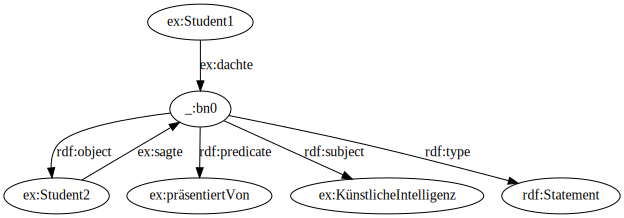

In [9]:
%%rdf turtle -l Seminar
@prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .
@prefix ex: <http://example.org/seminar/> .

# IHR CODE HIER
_:statement_ki_presented rdf:type rdf:Statement ;
    rdf:subject ex:KünstlicheIntelligenz ;
    rdf:predicate ex:präsentiertVon ;
    rdf:object ex:Student2 .

_:student2_said_ki_presented rdf:type rdf:Statement ;
    rdf:subject ex:Student2 ;
    rdf:predicate ex:sagte ;
    rdf:object _:statement_ki_presented .

ex:Student1 ex:dachte _:student2_said_ki_presented .

In [ ]:
# DIESEN TEIL NICHT VERÄNDERN, SONST GIBT ES 0 Punkte
# Aufgabe 10.2 b) (2 Punkte)
subtask_10_2b = SubTask(task2, "b", points=2)
tasks_ready[subtask_10_2b.task.task][subtask_10_2b.subtask] = False  

store = %rdf -r
g = store["rdfgraphs"]["Seminar"]

try:
    if len(g) == 0:
        warnings.warn("Es wurde keine Lösung erkannt, überprüfen sie ob ihr Code syntaktisch korrekt ist.")
    
    # Überprüfung der grundlegenden Struktur
    student1 = list(g.triples((URIRef("http://example.org/seminar/Student1"), None, None)))
    if not student1:
        warnings.warn("Student1 wurde nicht definiert. Überprüfen sie die Namen ihrer Ausdrücke. Bei falscher benennung kann es in der Auswertung dazu kommen, dass sie keine Punkte bekommen.")
    
    # Überprüfung auf mindestens ein rdf:Statement
    statements = list(g.triples((None, URIRef("http://www.w3.org/1999/02/22-rdf-syntax-ns#type"), 
                               URIRef("http://www.w3.org/1999/02/22-rdf-syntax-ns#Statement"))))
    if not statements:
        warnings.warn("Kein rdf:Statement gefunden")
    
    # Setze Status auf ready wenn mindestens einige Triples vorhanden sind
    tasks_ready[subtask_10_2b.task.task][subtask_10_2b.subtask] = (len(g) > 0)

except Exception as e:
    warnings.warn(f"Fehler beim Parsen der Lösung: {str(e)}")

subtask_10_2b.setSolution(store)

In [ ]:
# Autograder check (2 points total)


<div class="pull-left">
    <br>
    <h2> Aufgabe 10.3 (SPARQL) </h2>
</div>

<div class="pull-right">
    <h3> (6 Punkte) </h3>
</div>

<div class="row"><div class="pull-left"><h2>RDF-Graph </h2></div></div>

Ein Teil des Katalogs eines Streamingdienstes wurde als RDF-Modell archiviert. Sie werden nun beauftragt, die Archive nach Informationen zu durchsuchen. 

Im RDF-Modell sind Filme, Regisseure und einige Eigenschaften modelliert.
Regisseure `(c:Regisseur)` besitzen einen Namen, während Filme `(c:Film)` eine Länge `(p:laenge)`, ein Genre `(p:genre)`, den Regisseur `(p:regisseur)`, der sie gedreht hat, ihren Titel `(p:titel)` und ihr Erscheinungsjahr `(p:erscheinungsjahr)` als Eigenschaft haben:

<div class="alert alert-info">
    <b> WICHTIG: </b> <br>
    Sie müssen die folgende Zelle ausführen, da der Graph sonst für die folgenden Aufgaben nicht angesprochen werden kann.
    Für die Bearbeitung der Queries brauchen Sie NUR die folgenden Prefixe. Definieren Sie sich keine neuen Präfixe. Andere Präfixes führen automatisch zu 0 Punkten.
    Für Sie die nächste Zelle aus um die Präfixes benutzen zu können.
    </div>

In [13]:
%%rdf sparql --prefix
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>
PREFIX s: <http://example.org/subjekt#>
PREFIX p: <http://example.org/eigenschaften#>
PREFIX c: <http://example.org/klassen#>

SPARQL: Stored prefix.


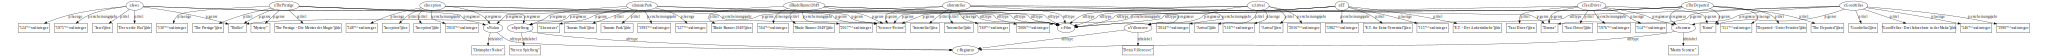

In [14]:
%%rdf turtle -l filme
@prefix c: <http://example.org/klassen#> .
@prefix p: <http://example.org/eigenschaften#> .
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .
@prefix s: <http://example.org/subjekt#> .
@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .

s:Spielberg a c:Regisseur ;
    rdfs:label "Steven Spielberg" .
    
s:Scorsese a c:Regisseur ;
    rdfs:label "Martin Scorsese" .
    
s:Nolan a c:Regisseur ;
    rdfs:label "Christopher Nolan" .

s:Villeneuve a c:Regisseur ;
    rdfs:label "Denis Villeneuve" .

s:Jaws a c:Film ;
    p:laenge          "124"^^xsd:integer  ;
    p:genre           "Thriller";
    p:regisseur       s:Spielberg ;
    p:titel           "Der weiße Hai"@de,
                      "Jaws"@en ;
    p:erscheinungsjahr "1975"^^xsd:integer  . 
    
s:Inception a c:Film ;
    p:laenge          "148"^^xsd:integer  ;
    p:genre           "Science-Fiction";
    p:regisseur       s:Nolan ;
    p:titel           "Inception"@de,
                      "Inception"@en ;
    p:erscheinungsjahr "2010"^^xsd:integer  . 
   
s:Goodfellas a c:Film ;
    p:laenge          "146"^^xsd:integer  ;
    p:genre           "Krimi",
                      "Drama";
    p:regisseur       s:Scorsese ;
    p:titel           "GoodFellas - Drei Jahrzehnte in der Mafia"@de,
                      "Goodfellas"@en ;
    p:erscheinungsjahr "1990"^^xsd:integer  .     

s:Interstellar a c:Film ;
    p:laenge          "169"^^xsd:integer  ;
    p:genre           "Science-Fiction",
                      "Drama" ;
    p:regisseur       s:Nolan ;
    p:titel           "Interstellar"@de,
                      "Interstellar"@en ;
    p:erscheinungsjahr "2014"^^xsd:integer  . 
    
s:Arrival a c:Film ;
    p:laenge          "116"^^xsd:integer  ;
    p:genre           "Science-Fiction";
    p:regisseur       s:Villeneuve ;
    p:titel           "Arrival"@de,
                      "Arrival"@en ;
    p:erscheinungsjahr "2016"^^xsd:integer  .

s:BladeRunner2049 a c:Film ;
    p:laenge          "164"^^xsd:integer  ;
    p:genre           "Science-Fiction";
    p:regisseur       s:Villeneuve ;
    p:titel           "Blade Runner 2049"@de,
                      "Blade Runner 2049"@en ;
    p:erscheinungsjahr "2017"^^xsd:integer  .

s:ET a c:Film ;
    p:laenge          "115"^^xsd:integer  ;
    p:genre           "Science-Fiction";
    p:regisseur       s:Spielberg ;
    p:titel           "E.T. - Der Außerirdische"@de,
                      "E.T. the Extra-Terrestrial"@en ;
    p:erscheinungsjahr "1982"^^xsd:integer  .

s:TaxiDriver a c:Film ;
    p:laenge          "114"^^xsd:integer  ;
    p:genre           "Krimi",
                      "Drama";
    p:regisseur       s:Scorsese ;
    p:titel           "Taxi Driver"@de,
                      "Taxi Driver"@en ;
    p:erscheinungsjahr "1976"^^xsd:integer  .     

s:TheDeparted a c:Film ;
    p:laenge          "151"^^xsd:integer  ;
    p:genre           "Krimi",
                      "Thriller";
    p:regisseur       s:Scorsese ;
    p:titel           "Departed - Unter Feinden"@de,
                      "The Departed"@en ;
    p:erscheinungsjahr "2006"^^xsd:integer  .

s:ThePrestige a c:Film ;
    p:laenge          "130"^^xsd:integer  ;
    p:genre           "Mystery",
                      "Thriller";
    p:regisseur       s:Nolan ;
    p:titel           "The Prestige - Die Meister der Magie"@de,
                      "The Prestige"@en ;
    p:erscheinungsjahr "2006"^^xsd:integer  .

s:JurassicPark a c:Film ;
    p:laenge          "127"^^xsd:integer  ;
    p:genre           "Science-Fiction",
                      "Abenteuer";
    p:regisseur       s:Spielberg ;
    p:titel           "Jurassic Park"@de,
                      "Jurassic Park"@en ;
    p:erscheinungsjahr "1993"^^xsd:integer  .


### Beispiel
Um die URI des Regisseur von Bladerunner 2049 zu erfragen, müssen Sie lediglich die folgende Anfrage starten:

In [15]:
%%rdf sparql -l filme -s test 
SELECT ?ergebnis
WHERE {
    s:BladeRunner2049 p:regisseur ?ergebnis
}

?ergebnis
http://example.org/subjekt#Villeneuve


<b>Schreiben Sie eine geeignete SPARQL Query für jede unter der Teilaufgabe genannten Anforderung. Vermeiden Sie dabei redundante Angaben.

<div class="alert alert-danger">
    <b> WICHTIG: </b> <br>
    Benutzen Sie für die Lösung der Aufgaben nur die in der Beschreibung angegebene[n] SELECT Variable[n] zum selektieren eines Ergebnisses. <br>
    Wenn als SELECT Variable beispielsweise <b>?ergebnis</b> angegeben ist, dann benutzen Sie bitte: <b>SELECT ?ergebnis WHERE {.....}</b> <br>
    Sollten sie nicht die vorgegebene Variable verwenden, wird die Lösung mit 0 Punkten bewertet, selbst wenn ihr Ergebnis richtig ist.
    </div>

<div class="row"><div class="pull-left"><h2>Teilaufgabe 10.3 a)</h2></div><div class="pull-right"><h3>(1 Punkt)</h3></div></div>

<b><br>Geben Sie ohne Duplikate die URIs aller Genres von Filmen deren Regisseur Martin Scorsese **(s:Scorsese)** ist aus.</b><br>
    
Verwenden Sie als **SELECT Variable: ?ergebnis**

**Tipp:** Verwenden Sie **DISTINCT**

In [10]:
%%rdf sparql -l filme -s 3a
# IHR CODE HIER
SELECT DISTINCT ?ergebnis
WHERE {
    ?film p:regisseur s:Scorsese ;
          p:genre ?ergebnis .
}

#Die Ausführung der nächsten Codezelle, erlaubt ihnen ihre Antwort in die Zusammenfassung am Ende aufzunehmen!

SPARQL: Graph labelled 'filme' not found.


In [ ]:
# DIESEN TEIL NICHT VERÄNDERN, SONST GIBT ES 0 Punkte
subtask_10_3a = SubTask(task3, "a", points=1)
tasks_ready[subtask_10_3a.task.task][subtask_10_3a.subtask] = False

try:
    shell = get_ipython()
    cell_content = shell.user_ns['_i']

    PARTIAL_BEGIN = "OLUTION"
    PARTIAL_END = "### EN"

    if PARTIAL_BEGIN in cell_content and PARTIAL_END in cell_content:
        after_begin = cell_content.split(PARTIAL_BEGIN, 1)[1]
        query_part = after_begin.split(PARTIAL_END, 1)[0]
    else:
        raise ValueError("Marker nicht gefunden")

    query_lines = [
        line for line in query_part.split('\n') if not line.strip().startswith('#')
    ]
    query_clean = ' '.join(line.strip() for line in query_lines if line.strip())
    
    if not query_clean.strip():
        warnings.warn("Keine SPARQL-Abfrage gefunden.")
    elif "SELECT" not in query_clean.upper():
        warnings.warn("Die Abfrage scheint kein SELECT-Query zu sein.")
    elif "DISTINCT" not in query_clean.upper():
        warnings.warn("Vergessen Sie nicht DISTINCT zu verwenden.")
    elif "?ergebnis" not in query_clean:
        warnings.warn("Die SELECT-Variable muss ?ergebnis heißen.")
    else:
        tasks_ready[subtask_10_3a.task.task][subtask_10_3a.subtask] = True

except Exception as e:
    warnings.warn(f"Abfrage konnte nicht automatisch geprüft werden. Fehler: {e}")
    tasks_ready[subtask_10_3a.task.task][subtask_10_3a.subtask] = True

subtask_10_3a.setSolution(None)


In [ ]:
# Autograder check

<div class="row"><div class="pull-left"><h2>Teilaufgabe 10.3 b)</h2></div><div class="pull-right"><h3>(1 Punkt)</h3></div></div>


<b><br>Geben Sie die URI und das Erscheinungsjahr aller Filme an, die vor dem Jahr 2000 veröffentlicht wurden und bei denen Scorsese nicht Regisseur war.</b><br>

Verwenden Sie als **SELECT Variable: ?ergebnis ?erscheinungsjahr**<br>
**Tipp:** Verwenden Sie Filtermethode **FILTER (X < Y)** und entweder **MINUS** oder **FILTER (X!=Y)**.

In [18]:
%%rdf sparql -l filme -s 3b
# IHR CODE HIER
SELECT ?ergebnis ?erscheinungsjahr
WHERE {
  ?ergebnis a c:Film ;
            p:erscheinungsjahr ?erscheinungsjahr ;
            p:regisseur ?regisseur .
  FILTER(?erscheinungsjahr < 2000)
  FILTER(?regisseur != s:Scorsese)
}
#Die Ausführung der nächsten Codezelle, erlaubt ihnen ihre Antwort in die Zusammenfassung am Ende aufzunehmen!

?ergebnis,?erscheinungsjahr
http://example.org/subjekt#Jaws,1975
http://example.org/subjekt#ET,1982
http://example.org/subjekt#JurassicPark,1993


In [ ]:
# DIESEN TEIL NICHT VERÄNDERN, SONST GIBT ES 0 Punkte
# Aufgabe 10.3 b) (1 Punkt)
subtask_10_3b = SubTask(task3, "b", points=1)
tasks_ready[subtask_10_3b.task.task][subtask_10_3b.subtask] = False

try:
    shell = get_ipython()
    cell_content = shell.user_ns['_i']

    PARTIAL_BEGIN = "OLUTION"
    PARTIAL_END = "### EN"

    if PARTIAL_BEGIN in cell_content and PARTIAL_END in cell_content:
        after_begin = cell_content.split(PARTIAL_BEGIN, 1)[1]
        query_part = after_begin.split(PARTIAL_END, 1)[0]
    else:
        raise ValueError("Marker nicht gefunden")

    query_lines = [line for line in query_part.split('\n') if not line.strip().startswith('#')]
    query_clean = ' '.join(line.strip() for line in query_lines if line.strip())

    if not query_clean.strip():
        warnings.warn("Keine SPARQL-Abfrage gefunden. Ist die Lösung leer?")
    elif "SELECT" not in query_clean.upper():
        warnings.warn("Die Abfrage scheint kein SELECT-Query zu sein.")
    elif "?ergebnis" not in query_clean or "?erscheinungsjahr" not in query_clean:
        warnings.warn("Die SELECT-Variablen müssen ?ergebnis und ?erscheinungsjahr heißen.")
    else:
        tasks_ready[subtask_10_3b.task.task][subtask_10_3b.subtask] = True

except Exception as e:
    warnings.warn("Kann die Abfrage nicht automatisch überprüfen. Bitte manuell prüfen.")
    tasks_ready[subtask_10_3b.task.task][subtask_10_3b.subtask] = True

subtask_10_3b.setSolution(None)


In [ ]:
# Autograder check

<div class="row"><div class="pull-left"><h2>Teilaufgabe 10.3 c)</h2></div><div class="pull-right"><h3>(2 Punkt)</h3></div></div>


<b><br>Geben Sie den englischen Titel aller Filme des Thriller-Genres und deren Erscheinungsjahr an. Ordnen Sie die Ergebnisse absteigend nach Erscheinungsjahr.</b><br>

Verwenden Sie als **SELECT Variable: ?ergebnis ?erscheinungsjahr**<br>
**Tipp:** Verwenden Sie Filtermethode **FILTER (X = Y)**. 

Die Funktion **lang(Z)** gibt den Sprach-Tag von Z aus, der Sprach-Tag für englisch ist "en", wenn Z keinen Sprach-Tag hat wird "" zurück gegeben.

In [20]:
%%rdf sparql -l filme -s 3c
# IHR CODE HIER
SELECT ?ergebnis ?erscheinungsjahr
WHERE {
  ?film a c:Film ;
        p:genre "Thriller" ;
        p:erscheinungsjahr ?erscheinungsjahr ;
        p:titel ?ergebnis .
  FILTER(lang(?ergebnis) = "en")
}
ORDER BY DESC(?erscheinungsjahr)

#Die Ausführung der nächsten Codezelle, erlaubt ihnen ihre Antwort in die Zusammenfassung am Ende aufzunehmen!

?ergebnis,?erscheinungsjahr
The Departed,2006
The Prestige,2006
Jaws,1975


In [ ]:
# DIESEN TEIL NICHT VERÄNDERN, SONST GIBT ES 0 Punkte
# Aufgabe 10.3 c) (2 Punkt)
subtask_10_3c = SubTask(task3, "c", points=2)
tasks_ready[subtask_10_3c.task.task][subtask_10_3c.subtask] = False

try:
    shell = get_ipython()
    cell_content = shell.user_ns['_i']

    PARTIAL_BEGIN = "OLUTION"
    PARTIAL_END = "### EN"

    if PARTIAL_BEGIN in cell_content and PARTIAL_END in cell_content:
        after_begin = cell_content.split(PARTIAL_BEGIN, 1)[1]
        query_part = after_begin.split(PARTIAL_END, 1)[0]
    else:
        raise ValueError("Marker nicht gefunden")

    query_lines = [line for line in query_part.split('\n') if not line.strip().startswith('#')]
    query_clean = ' '.join(line.strip() for line in query_lines if line.strip())

    if not query_clean.strip():
        warnings.warn("Keine SPARQL-Abfrage gefunden. Ist die Lösung leer?")
    elif "SELECT" not in query_clean.upper():
        warnings.warn("Die Abfrage scheint kein SELECT-Query zu sein.")
    elif "?ergebnis" not in query_clean or "?erscheinungsjahr" not in query_clean:
        warnings.warn("Die SELECT-Variablen müssen ?ergebnis und ?erscheinungsjahr heißen.")
    else:
        tasks_ready[subtask_10_3c.task.task][subtask_10_3c.subtask] = True

except Exception as e:
    warnings.warn("Kann die Abfrage nicht automatisch überprüfen. Bitte manuell prüfen.")
    tasks_ready[subtask_10_3c.task.task][subtask_10_3c.subtask] = True

subtask_10_3c.setSolution(None)


In [ ]:
# Autograder check

<div class="row"><div class="pull-left"><h2>Teilaufgabe 10.3 d)</h2></div><div class="pull-right"><h3>(2 Punkt)</h3></div></div>

<b><br>Bitte geben Sie die deutschen und englischen Titel aller  Filme, bei denen Scorsese oder Spielberg regisseur war, zusammen mit ihrem Genre an.</b><br>

Verwenden Sie als **SELECT Variable: ?titel ?genre**<br>
Tipp: Verwenden Sie **UNION**.

In [21]:
%%rdf sparql -l filme -s 3d
# IHR CODE HIER
SELECT ?titel ?genre
WHERE {
  {
    ?film a c:Film ;
          p:regisseur s:Scorsese ;
          p:titel ?titel ;
          p:genre ?genre .
  }
  UNION
  {
    ?film a c:Film ;
          p:regisseur s:Spielberg ;
          p:titel ?titel ;
          p:genre ?genre .
  }
}

?titel,?genre
GoodFellas - Drei Jahrzehnte in der Mafia,Krimi
Goodfellas,Krimi
GoodFellas - Drei Jahrzehnte in der Mafia,Drama
Goodfellas,Drama
Taxi Driver,Krimi
Taxi Driver,Krimi
Taxi Driver,Drama
Taxi Driver,Drama
Departed - Unter Feinden,Krimi
The Departed,Krimi


In [ ]:
# DIESEN TEIL NICHT VERÄNDERN, SONST GIBT ES 0 Punkte
# Aufgabe 10.3 d) (2 Punkte)
subtask_10_3d = SubTask(task3, "d", points=2)
tasks_ready[subtask_10_3d.task.task][subtask_10_3d.subtask] = False

try:
    shell = get_ipython()
    cell_content = shell.user_ns['_i']

    PARTIAL_BEGIN = "OLUTION"
    PARTIAL_END = "### EN"

    if PARTIAL_BEGIN in cell_content and PARTIAL_END in cell_content:
        after_begin = cell_content.split(PARTIAL_BEGIN, 1)[1]
        query_part = after_begin.split(PARTIAL_END, 1)[0]
    else:
        raise ValueError("Marker nicht gefunden")

    query_lines = [line for line in query_part.split('\n') if not line.strip().startswith('#')]
    query_clean = ' '.join(line.strip() for line in query_lines if line.strip())

    if not query_clean.strip():
        warnings.warn("Keine SPARQL-Abfrage gefunden. Ist die Lösung leer?")
    elif "SELECT" not in query_clean.upper():
        warnings.warn("Die Abfrage scheint kein SELECT-Query zu sein.")
    elif "?titel" not in query_clean or "?genre" not in query_clean:
        warnings.warn("Die SELECT-Variablen müssen ?titel und ?genre heißen.")
    else:
        tasks_ready[subtask_10_3d.task.task][subtask_10_3d.subtask] = True

except Exception as e:
    warnings.warn("Kann die Abfrage nicht automatisch überprüfen. Bitte manuell prüfen.")
    tasks_ready[subtask_10_3d.task.task][subtask_10_3d.subtask] = True

subtask_10_3d.setSolution(None)


In [ ]:
# Autograder check

<div class="pull-left">
    <br>
    <h2> Aufgabe 10.4 (RDF Graph) </h2>
</div>

<div class="pull-right">
    <h3> (5 Punkte) </h3>
</div>

# RDF Modellierungsaufgabe: Vorlesungen, Studenten und Professoren

## Aufgabenbeschreibung

Sie wurden beauftragt, Informationen und Interaktionen zwischen Vorlesungen, Studenten und Professoren als RDF Schema zu modellieren.

### Bekannte Vorlesungen:

- "Berechenbarkeit und Komplexität" wird von Professor Rossmanith gehalten.
- "Erfüllbarkeitsüberprüfung" wird von Professorin Ábrahám gehalten.
- "Datenbanken und Informationssysteme" wird von Professor Decker gehalten.
- "Systemprogrammierung" wird von Professor Kowalewski gehalten.
- "Software Language Engineering" wird von Professor Rumpe gehalten.
- "Softwaretechnik" wird von Professor Rumpe gehalten.

### Bekannte Daten über die Personen:

- Vorlesungen werden im Sommersemester 2025 an der RWTH Aachen angeboten.
- Die Studenten heißen Chris, Tom, Simon, Lucie und Viktoria.
- Studenten belegen verschiedene Vorlesungen bei verschiedenen Professoren:

    - Chris hört "Berechenbarkeit und Komplexität", "Erfüllbarkeitsüberprüfung" und "Softwaretechnik.
    - Tom hört "Erfüllbarkeitsüberprüfung" und "Software Language Engineering".
    - Simon hört "Datenbanken und Informationssysteme" und "Berechenbarkeit und Komplexität".
    - Lucie hört "Systemprogrammierung", "Datenbanken und Informationssysteme" und "Softwaretechnik".
    - Viktoria hört "Software Language Engineering" und "Systemprogrammierung".

Modellieren Sie ein RDF Schema, welches den Sachverhalt wiedergibt. Verwenden Sie dazu nur Strings oder das folgende Vokabular:

    ex:Softwaretechnik
    ex:BerechenbarkeitKomplexität
    ex:Erfüllbarkeitsüberprüfung
    ex:DatenbankenInformationssysteme
    ex:Systemprogrammierung
    ex:SoftwareLanguageEngineering
    ex:ProfRossmanith
    ex:ProfÁbrahám
    ex:ProfDecker
    ex:ProfKowalewski
    ex:ProfRumpe
    ex:Chris
    ex:Tom
    ex:Simon
    ex:Lucie
    ex:Viktoria
    ex:hältVorlesung
    ex:hörtVorlesung

Anmerkungen:\
Falls Professor X eine Vorlesung Y hält, gilt: ex:X ex:hältVorlesung ex:Y. \
Falls Student Z eine Vorlesung Y hört, gilt: ex:Z ex:hörtVorlesung ex:Y.


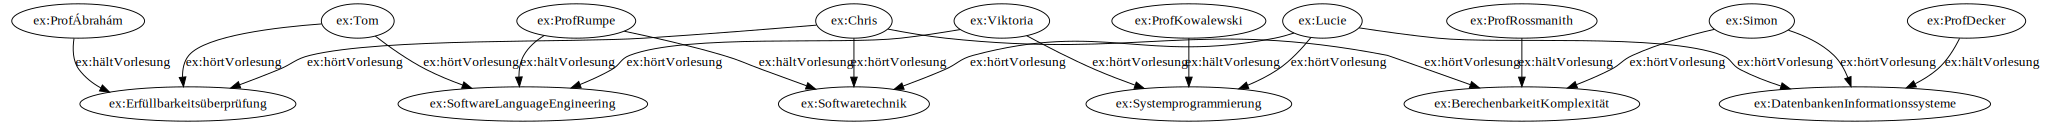

In [22]:
%%rdf turtle -l vorlesungen

@prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .
@prefix ex: <http://example.org/rwth/> .

# IHR CODE HIER
ex:ProfRossmanith ex:hältVorlesung ex:BerechenbarkeitKomplexität .
ex:ProfÁbrahám ex:hältVorlesung ex:Erfüllbarkeitsüberprüfung .
ex:ProfDecker ex:hältVorlesung ex:DatenbankenInformationssysteme .
ex:ProfKowalewski ex:hältVorlesung ex:Systemprogrammierung .
ex:ProfRumpe ex:hältVorlesung ex:SoftwareLanguageEngineering, ex:Softwaretechnik .

ex:Chris ex:hörtVorlesung ex:BerechenbarkeitKomplexität, ex:Erfüllbarkeitsüberprüfung, ex:Softwaretechnik .
ex:Tom ex:hörtVorlesung ex:Erfüllbarkeitsüberprüfung, ex:SoftwareLanguageEngineering .
ex:Simon ex:hörtVorlesung ex:DatenbankenInformationssysteme, ex:BerechenbarkeitKomplexität .
ex:Lucie ex:hörtVorlesung ex:Systemprogrammierung, ex:DatenbankenInformationssysteme, ex:Softwaretechnik .
ex:Viktoria ex:hörtVorlesung ex:SoftwareLanguageEngineering, ex:Systemprogrammierung .

#Die Ausführung der nächsten Codezelle, erlaubt ihnen ihre Antwort in die Zusammenfassung am Ende aufzunehmen!

In [ ]:

subtask_10_4a = SubTask(task4, "a", points=5)  
tasks_ready["10.4"]["a"] = False  

store = %rdf -r
g = store["rdfgraphs"]["vorlesungen"]

# Check 1: Mindestens ein Triple vorhanden?
if len(g) == 0:
    warnings.warn("Keine RDF-Triples gefunden. Ist die Lösung leer?")
else:
    tasks_ready["10.4"]["a"] = True  # Nur als ready markieren, wenn Triples existieren

# Check 2: Existieren beide Prädikate (hältVorlesung/hörtVorlesung)?
predicates = {str(p) for _, p, _ in g}
required_predicates = {
    "http://example.org/rwth/hältVorlesung",
    "http://example.org/rwth/hörtVorlesung"
}
missing_preds = required_predicates - predicates
if missing_preds:
    warnings.warn(f"Fehlende Prädikate: {', '.join(missing_preds)}")

# Speichere den Store für den Autograder
subtask_10_4a.setSolution(store)

In [ ]:
# Autograder check

In [1]:
# overview
tasks = ["10.1", "10.2", "10.3", "10.4"]
from IPython.display import display, HTML
points = 0
display(HTML(f"<div class='alert alert-info'><h2>Wenn für eine Teilaufgabe keine Ergebnisse gefunden wurden, prüfen sie ihre Antworten und führen sie die Code Zelle die der Teilaufgabe folgt aus.</h2></div>"))

for t in tasks:
    display(HTML(f"<div class='alert alert-info'><h4>Sammle Ergebnisse von Teilaufgabe {t}:</h4></div>"))

    task = exc.getTaskByLabel(t)
    subtasks = task.getSubtasks()
    for i in subtasks:
        display(HTML(f"<div class='alert alert-info'><h4>Sammle Ergebnisse von Teilaufgabe {t}{subtasks[i].subtask}):</h4></div>"))
        try:
            subTaskGraph = subtasks[i].getSolution()
        except Exception as e:
            display(HTML(f"<div class='alert alert-danger'> Teilaufgabe {t}{subtasks[i].subtask}) wurde nicht ordnungsgemäß ausgeführt.<br /> Überprüfen Sie die Warnings. </div>"))
            continue
        else:
            if not tasks_ready[subtasks[i].task.task][subtasks[i].subtask]:
                display(HTML(f"<div class='alert alert-danger'> Teilaufgabe {t}{subtasks[i].subtask}) wurde nicht ordnungsgemäß ausgeführt.<br /> Überprüfen Sie die Warnings. </div>"))
                continue
            points += subtasks[i].getPoints()
            display(HTML(f"<div class='alert alert-success'> ... BEARBEITET (+max. {subtasks[i].getPoints()} Punkte) </div>"))

display(HTML(f"<div class='alert alert-success'><h3>Es wurden insgesamt Teilaufgaben für max. {points}/20 Punkte gefunden.</h3></div><hr />"))

NameError: name 'exc' is not defined